# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортировали библиотеку pandas
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открыли файл формата .csv
print(data) #распечатали первые пять строк таблицы

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

In [2]:
data.info() #общая информация о данных


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.describe() #получили числовое описание данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Мы получили общую информацию о данных. Видим, что в данных присутствуют пропуски, некоторые данные имеют неверный тип. Также методом describe() получили числовое описание данных.

### Шаг 2. Предобработка данных

In [4]:
#обработка пропусков
#data.isnull().sum()
#наибольшее кол-во пропусков в столбце 'is_apartment', здесь неверный тип данных, поменяем на булевый тип
data['is_apartment']=data['is_apartment'].astype('bool')
#заполним пропуски в столбце с балконами 0, так как в квартирах балконов может и небыть
data['balcony'] = data['balcony'].fillna(0)
#пропуски в столбце с количеством этажей в доме, скорее всего дом одноэтажный
data['floors_total'] = data['floors_total'].fillna(1)
data['parks_around3000'] = data['parks_around3000'].fillna(0) #парков тоже может не быть в радиусе 3км
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #с водоемами, аналогично как с парками
#пропуски в столбце с высотой потолков можно заменить на медианной значение, так как высота потолков в домах, обычно,стандартная,поэтому заменяем медианным значением 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#поменяем тип данных в следующих столбцах
data['last_price']=data['last_price'].astype('int64') # цена - целое число
data['total_area']=data['total_area'].astype('int32') #площадь квартиры - целое число
data['floors_total']=data['floors_total'].astype('int32') #количество этажей в доме - целое значение
data['parks_around3000']=data['parks_around3000'].astype('int32') #количество парков - целое значение
data['ponds_around3000']=data['ponds_around3000'].astype('int32') #количество прудов - целое значение
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int32
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around3000        

Вывод
Мы провели предобработку данных. Обработали пропуски в столбцах, где было возможно заполнить пропуски заменили на соответствующие значения. Также поменяли тип данных в столбцах, где было нужно.

### Шаг 3. Посчитайте и добавьте в таблицу

In [6]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).astype('int') #цена квадратного метра
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #приведет к типу datetime
#получим день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.map({0:'Пн.', 1:'Вт.', 2:'Ср.', 3:'Чт.',4:'Пт.', 5:'Сб.', 6:'Вс.'})
data['month_exposition'] = data['first_day_exposition'].dt.month.map({0:'Янв.', 1:'Февр.', 2:'Март', 3:'Апр.', 4:'Май', 5:'Июнь', 6:'Июль', 7:'Авг.',8:'Сент.', 9:'Окт.', 10:'Нояб.', 11:'Дек.'})
data['year_exposition'] = data['first_day_exposition'].dt.year
#этаж квартиры
floor_cat = ['первый', 'последний']
data.loc[data['floor']== 1, 'floor'] = floor_cat[0]
data.loc[data['floor'] == data['floors_total'], 'floor'] = floor_cat[1]
data['floor'] = data['floor'].where(data['floor'].isin(floor_cat), 'другие')
#соотношение жилой к общей площади
data['liv_tot_per'] = data['living_area'] * 100 / data['total_area']
#соотношение кухни к общей площади
data['kit_tot_per'] = data['kitchen_area'] * 100 / data['total_area']
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area   floor  is_apartment  ...  \
0            2.70            16         51.0  другие          True  ...   
1            2.65            11         18.6  первый          True  ...   
2            2.65             5         34.3  другие          True  ...   
3            2.65            14          NaN  другие          True  ...   
4            3.03            14         32.0  другие          True  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0   

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

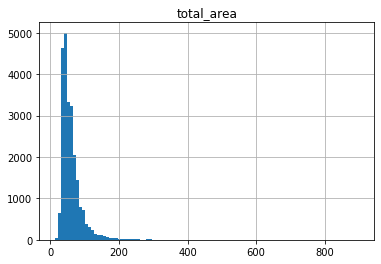

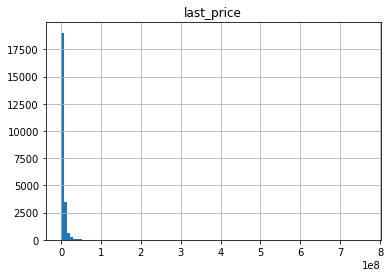

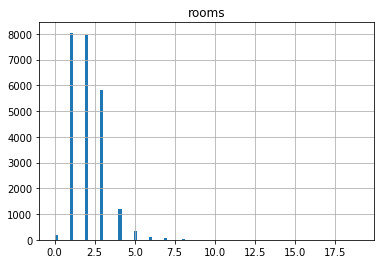

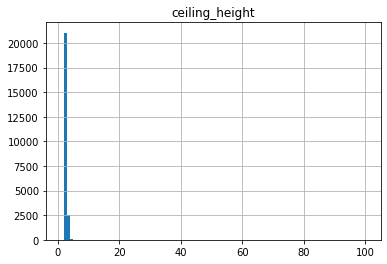

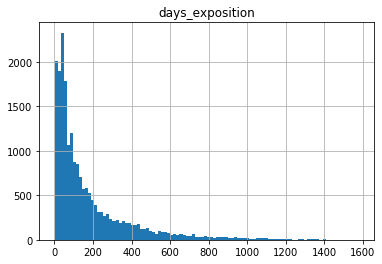

In [20]:
#data.hist("total_area", bins=100, range=(20,400))  #гистограмма площади 
#data.hist("last_price", bins=100, range=(0, 70000000))   #гистограмма цены
#data.hist("rooms", bins=50,range=(0,10) ) #гистограмма комнат
#data.hist("ceiling_height", bins=50, range=(0,5)) #гистограмма высоты

#цикл для построения гистограмм
for column in ['total_area', 'last_price', 'rooms','ceiling_height', 'days_exposition']:
    if column == 'total_area':
        range=(20,400)
    elif column == 'last_price':
        range=(0,70000000)
    elif column == 'rooms':
        range=(0,10)
    elif column == 'ceiling_height':
        range=(0,5)
    else:
        range=(0,1500)
    data.hist(column, bins=100)

Мы получили гистограммы для площади, цены, числа комнат и высоты потолков. Распределение у этих параметров пуассоновское. Из полученных графиков можно сделать вывод, что наибольшее число выставленных на продажу квартир - это однокомнатные или двухкомнатные квартиры.Таким обрахом площадь таких квартир небольшая. Средняя высота потолков в квартирах 2.7 м. 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

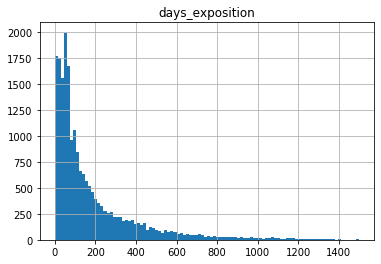

In [8]:
#data.hist("days_exposition",bins=100,range=(0,1500)) #гистограмма времени продажи
data['days_exposition'].describe()


Из полученных данных видим, что примерно полгода занимает в среднем продажа квартиры. Самая быстрая продажа осуществилась за 1 день, а самая долгая больше 4 лет. Из численного описания быстрыми продажами можно считать продажи, совершенные за 45 дней, и долгими - более чем 95 дней. 

In [9]:
#посмотрим на числовое описание параметров 
data[['total_area', 'last_price', 'days_exposition', 'price_per_m2']].describe()

,total_area,last_price,days_exposition,price_per_m2
count,23699.000000,2.369900e+04,20518.000000,2.369900e+04
mean,60.120511,6.541549e+06,180.888634,9.987371e+04
std,35.665822,1.088701e+07,219.727988,5.041842e+04
min,12.000000,1.219000e+04,1.000000,1.110000e+02
25%,40.000000,3.400000e+06,45.000000,7.698500e+04
50%,52.000000,4.650000e+06,95.000000,9.545400e+04
75%,69.000000,6.800000e+06,232.000000,1.148640e+05
max,900.000000,7.630000e+08,1580.000000,1.907500e+06


Можно заметить некоторые аномалии в виде, площадь квартиры в 900м^2, нереально высокую стоимость 1м^2 и т.д. 

In [10]:
#напишем функцию  удаления выбросов
def del_outliers(data, column, graphic=0, x=10, y=10):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    sifter = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic==1:
        return data.loc[sifter].boxplot([column], figsize=(x,y))
    else:
        return data.loc[sifter]

53.9537314099415

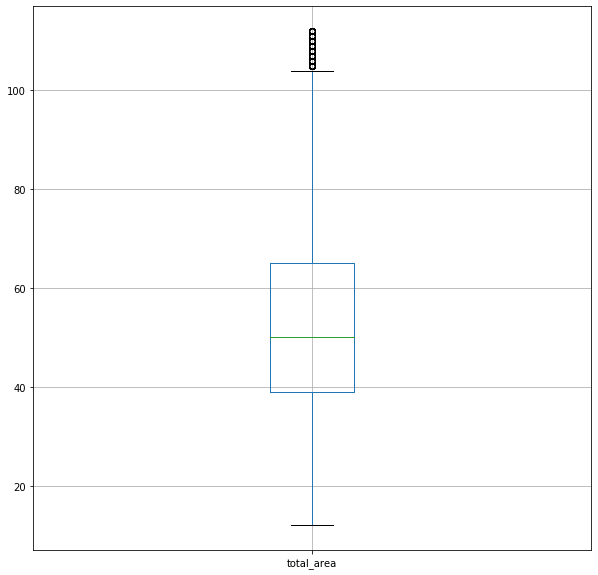

In [11]:
#удалим выбросы из колонки площадь
del_outliers(data, 'total_area', 1, 10,10)
del_outliers(data, 'total_area', 0)['total_area'].mean() #среднее значение площади без выбросов

4848768.313270251

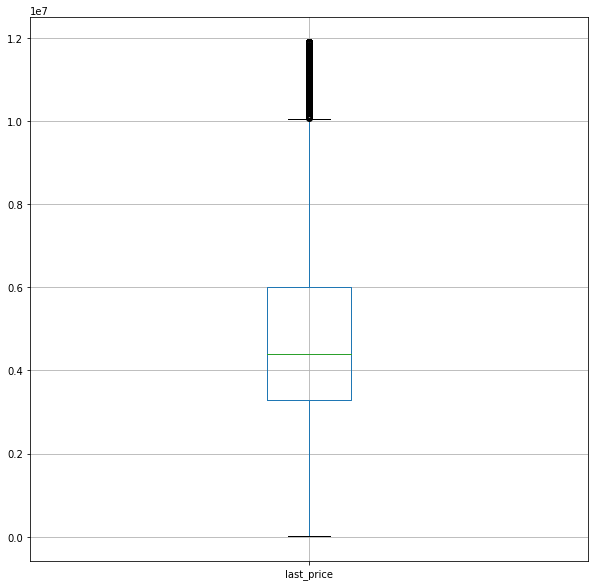

In [12]:
#удалим выбросы из колонки цены на момент снятия с публикации
del_outliers(data, 'last_price', 1, 10,10)
del_outliers(data, 'last_price', 0)['last_price'].mean() #среднее значение цены на момент снятия с публикации без выбросов

128.75388614780624

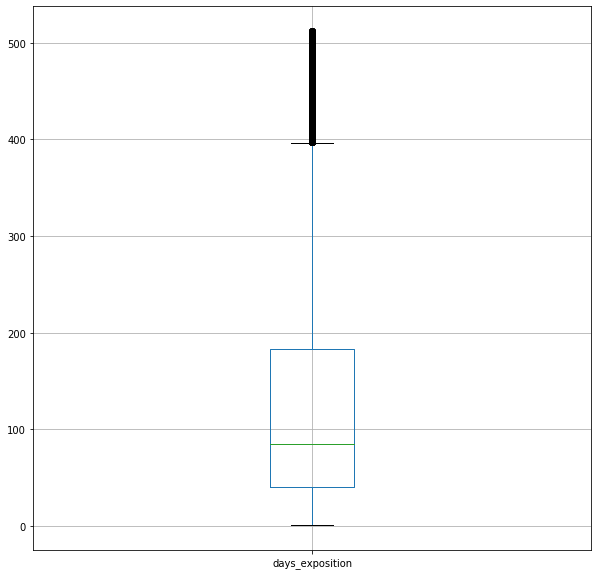

In [13]:
#удалим выбросы из колонки возратса объявления
del_outliers(data, 'days_exposition', 1, 10,10)
del_outliers(data, 'days_exposition', 0)['days_exposition'].mean() #среднее значение возраста объявления без выбросов

94223.43241211586

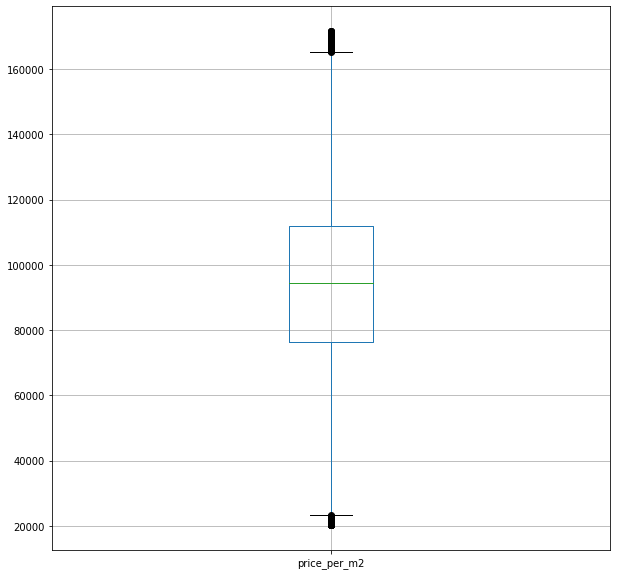

In [14]:
#удалим выбросы из колонки цены за квадратный метр
del_outliers(data, 'price_per_m2', 1, 10,10)
del_outliers(data, 'price_per_m2', 0)['price_per_m2'].mean() #среднее значение цены за квадратный метр без выбросов

In [15]:
#выведем таблицу корреляций 
corr_tab = data[['last_price', 'total_area', 'rooms','cityCenters_nearest', 'days_exposition']].corr()
print(corr_tab)

                     last_price  total_area     rooms  cityCenters_nearest  \
last_price             1.000000    0.653654  0.363343            -0.206747   
total_area             0.653654    1.000000  0.758347            -0.231466   
rooms                  0.363343    0.758347  1.000000            -0.184864   
cityCenters_nearest   -0.206747   -0.231466 -0.184864             1.000000   
days_exposition        0.081146    0.149711  0.126961            -0.060714   

                     days_exposition  
last_price                  0.081146  
total_area                  0.149711  
rooms                       0.126961  
cityCenters_nearest        -0.060714  
days_exposition             1.000000  


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(0, 200000)

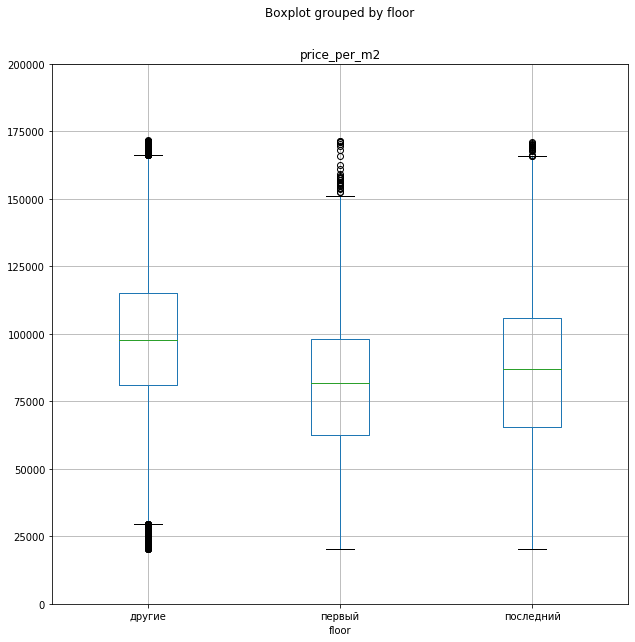

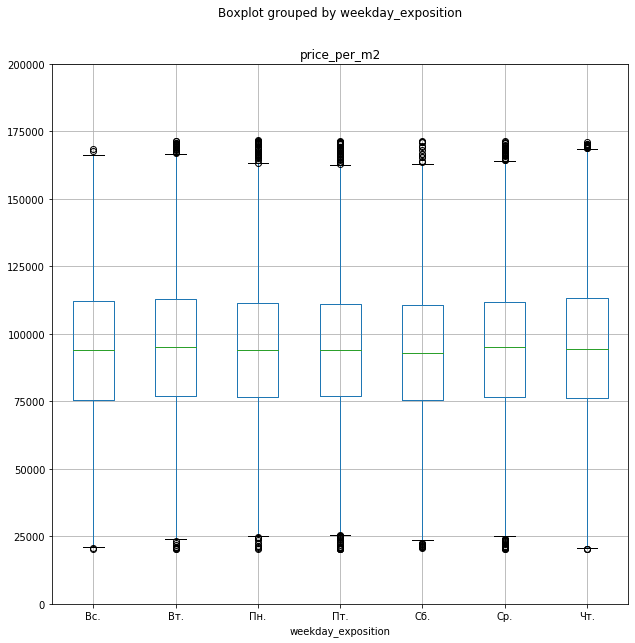

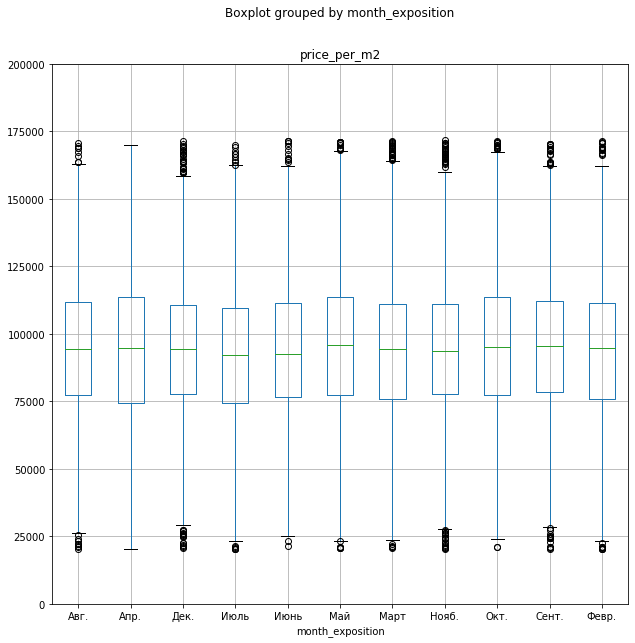

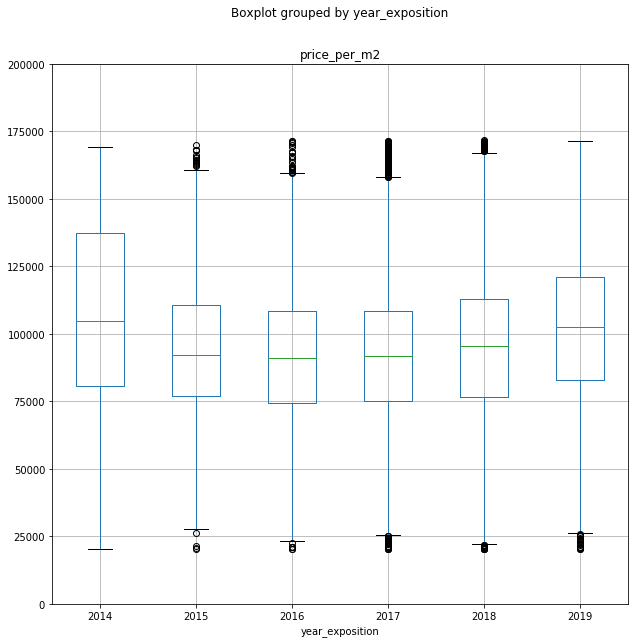

In [16]:
#построим графики зависимости цены от этажа, дня недели, месяца и года размещения объявления
del_outliers(data,'price_per_m2',0).boxplot('price_per_m2', by='floor',figsize=(10,10)).set_ylim(0,200000)
del_outliers(data,'price_per_m2',0).boxplot('price_per_m2', by='weekday_exposition',figsize=(10,10)).set_ylim(0,200000)
del_outliers(data,'price_per_m2',0).boxplot('price_per_m2', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)
del_outliers(data,'price_per_m2',0).boxplot('price_per_m2', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

Корреляция в 0.65 говорит о наличии связи цены и площади, однако не слишком сильной. Получается, что чем больше площадь, тем выше  цена. Корреляция цены и количества комнат слабее чем зависимость полощади и цены. Отрицательная корреляция цены и удаленности от центра говорит о том, что чем ближе к центру, тем выше цена. Также видна слабая зависимость цены и даты размещения.


In [17]:
top_10_locality_name = data['locality_name'].value_counts().head(10).index
(data
    .groupby('locality_name')
    .agg({'price_per_m2':'mean'})
    .sort_values(by='price_per_m2',ascending=False)
    .query('locality_name in @top_10_locality_name'))



,price_per_m2
locality_name,
Санкт-Петербург,115347.299472
Пушкин,103610.948509
деревня Кудрово,93001.742475
посёлок Парголово,90675.235474
посёлок Мурино,86379.549808
посёлок Шушары,79068.186364
Колпино,75735.150888
Гатчина,69045.068404
Всеволожск,68984.801508


В этих 10 населенных пунктах самое большое количество объявлений. Самое дорогое жилье, 115347 рублей за м^2, продается в Санкт-Петербурге, а в Выборге гораздо дешевле, 58296 рублей за м^2.

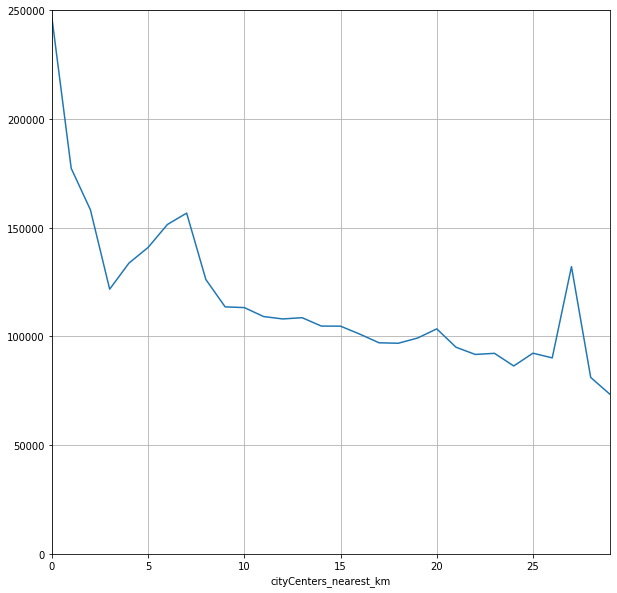

In [18]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round() #расстояние до центра в км     
spb_data = data.query('(locality_name == "Санкт-Петербург") & (~cityCenters_nearest.isna())').reset_index() #данные о квартирах в СПб
(spb_data
         .groupby('cityCenters_nearest_km')['price_per_m2'].mean()
         .plot(x='cityCenters_nearest_km', y='price_per_m2', kind = 'line', ylim=(0,250000), grid=True, figsize=(10,10))) #график зависимости цены от удаленности от центра

Из полученого графика можно считать, что центральная зона - площадь радиусом в 8-9км.

                     last_price  total_area     rooms  cityCenters_nearest  \
last_price             1.000000    0.638870  0.340541            -0.078142   
total_area             0.638870    1.000000  0.743010            -0.141276   
rooms                  0.340541    0.743010  1.000000            -0.207007   
cityCenters_nearest   -0.078142   -0.141276 -0.207007             1.000000   
days_exposition        0.065507    0.141995  0.133811            -0.075549   

                     days_exposition  
last_price                  0.065507  
total_area                  0.141995  
rooms                       0.133811  
cityCenters_nearest        -0.075549  
days_exposition             1.000000  


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(0, 200000)

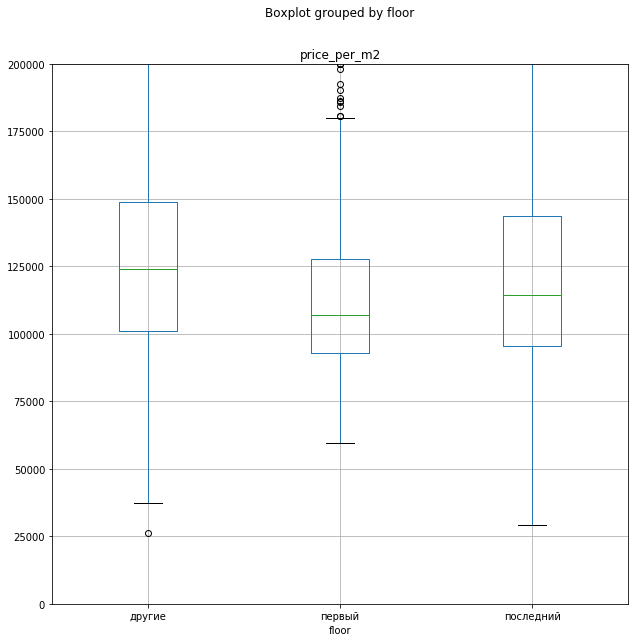

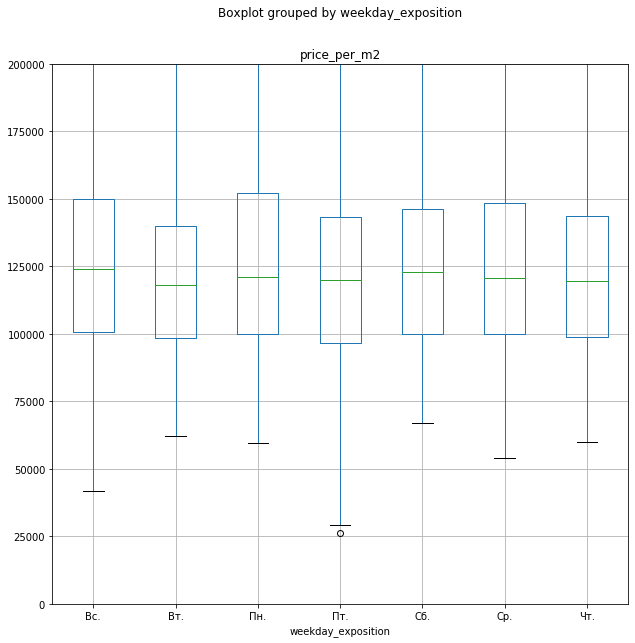

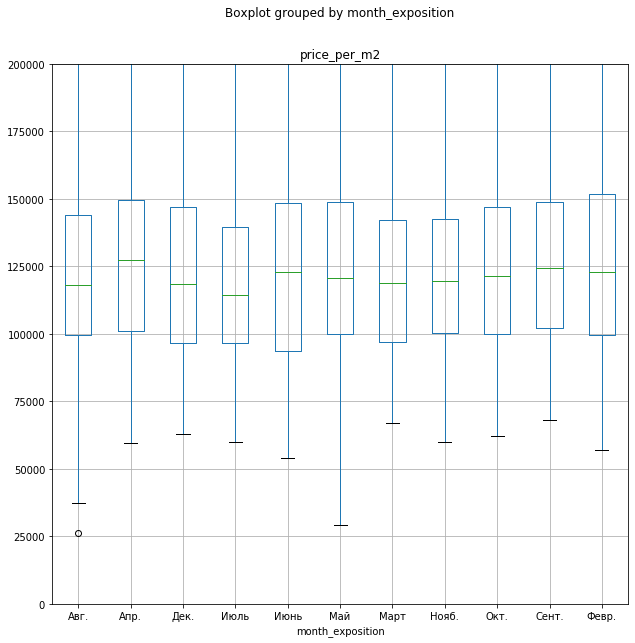

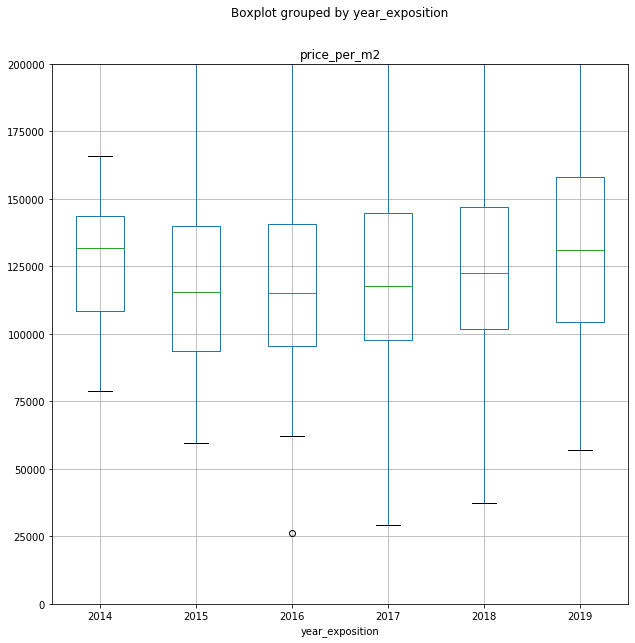

In [19]:
spb_center_data = spb_data.query('cityCenters_nearest_km <= 8').reset_index()
#print(spb_center_data)
# выведем матрицу корреляции 
corr_spb_center_tab = spb_center_data[['last_price', 'total_area', 'rooms','cityCenters_nearest', 'days_exposition']].corr()
print(corr_spb_center_tab)
#построим графики зависимости цены от этажа, дня недели, месяца и года размещения объявления
del_outliers(spb_center_data,'price_per_m2',0).boxplot('price_per_m2', by='floor',figsize=(10,10)).set_ylim(0,200000)
del_outliers(spb_center_data,'price_per_m2',0).boxplot('price_per_m2', by='weekday_exposition',figsize=(10,10)).set_ylim(0,200000)
del_outliers(spb_center_data,'price_per_m2',0).boxplot('price_per_m2', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)
del_outliers(spb_center_data,'price_per_m2',0).boxplot('price_per_m2', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

Мы получили данные аналогичные с общим выводом по всему городу. Положительные корреляции цены от площади и количества комнат, 

### Шаг 5. Общий вывод

  Таким образом, мы получили, что цена квартир больше всего зависит от площади и количества комнат, также на нее оказывает влияние местонахождение. То есть квартиры в центре стоят дороже чем в пригороде. Датасет с выбросами и датасет без выбросов дают практически один и тот же результат. 
  Рекомендации:
 -для более наглядного представления о местоположении расстояния следует записывать в км и в целых числах
 -получение информации о парках, прудах и аэропортах автоматически
 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод